# Seminar 7

In [ ]:
# Importing useful libraries and loading data set

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

For this  session we will use the [Car Price Prediction](https://www.kaggle.com/datasets/hellbuoy/car-price-prediction?resource=download&select=CarPrice_Assignment.csv) dataset from Kaggle.

The object is the predict car prices using the other independent variables.

In [35]:
df = pd.read_excel('car_prices.xlsx')
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


<b>
1. Create a correlation matrix between the numerical variables. You may wish to use a heatmap to help visualize
</b>

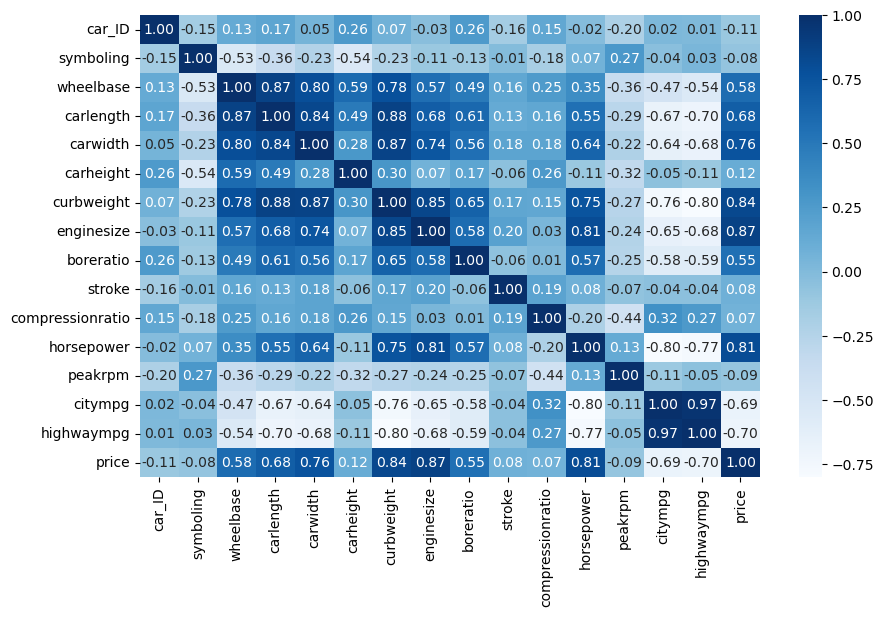

In [11]:
corr_matrix = df.select_dtypes(include='number').corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt='.2f')
plt.show()

<b>
2. Note that some variables, such as fuletype are categorical, not numerical. Use the pandas function get_dummies() to transform categorical variables into dummy variables.
</b>

In [36]:
df = pd.get_dummies(df, dtype=int) 

<b>
3. Regress Price on fueltype_gas, fueltype_diesel, enginesize and horsepower. Is there any potential problems with this model specification? Explain
</b>

In [5]:
formula = 'price ~ fueltype_gas + fueltype_diesel + enginesize + horsepower'
model_price = smf.ols(formula,car_data).fit()
print(model_price.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     280.6
Date:                Wed, 26 Mar 2025   Prob (F-statistic):           1.41e-71
Time:                        11:58:03   Log-Likelihood:                -1963.7
No. Observations:                 205   AIC:                             3935.
Df Residuals:                     201   BIC:                             3949.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -4601.2507    591.328     

<b>
4. Now regress Price on fueltype_gas, enginesize and horsepower.
</b>

In [38]:
formula = 'price ~ fueltype_gas + enginesize + horsepower'
model_price = smf.ols(formula,car_data).fit()
print(model_price.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     280.6
Date:                Wed, 26 Mar 2025   Prob (F-statistic):           1.41e-71
Time:                        12:13:00   Log-Likelihood:                -1963.7
No. Observations:                 205   AIC:                             3935.
Df Residuals:                     201   BIC:                             3949.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -5188.1332   1157.902     -4.481   

<b>
5. What is the interpretation for the coefficient of the variable horsepower?
</b>

For each additional horsepower the car has, the price increases in average by 75 monetary units, holding other regressors constant.

<b>
6. Create a scatterplot to visualize the relationship between price of the car and car length. Does this relationship look linear?
</b>

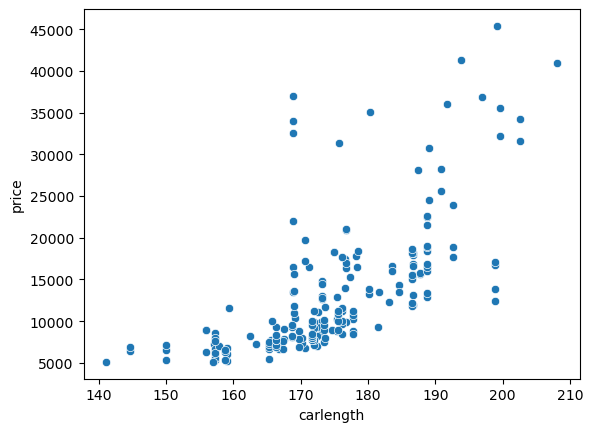

In [42]:
y_value = df['price']
x_value = df['carlength']

sns.scatterplot(data=df, x=x_value, y=y_value)
plt.show()

<b>
7. Create a new variable to represent the squared values of car length.
</b>

In [ ]:
df['cl2'] = df['carlength']**2

<b>
8. Now regress Price on fueltype_gas, enginesize, horsepower, carlength and the squared of car length.
</b>

In [44]:
formula = 'price ~ fueltype_gas + enginesize + horsepower + carlength + cl2'
model_price = smf.ols(formula,df).fit()
print(model_price.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     200.1
Date:                Wed, 26 Mar 2025   Prob (F-statistic):           1.36e-75
Time:                        12:15:58   Log-Likelihood:                -1948.3
No. Observations:                 205   AIC:                             3909.
Df Residuals:                     199   BIC:                             3929.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1.492e+05   3.58e+04      4.169   

<b>
9. Create a variable for the logarithm of the car price.
</b>

In [ ]:
df['lprice'] = np.log(df['price'])

<b>
10. Now regress the logarithm of car price on fueltype_gas, enginesize and horsepower.
</b>

In [47]:
formula = 'lprice ~ fueltype_gas + enginesize + horsepower'
model_price = smf.ols(formula,df).fit()
print(model_price.summary())

                            OLS Regression Results                            
Dep. Variable:                 lprice   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     258.4
Date:                Wed, 26 Mar 2025   Prob (F-statistic):           1.08e-68
Time:                        12:17:33   Log-Likelihood:                 12.135
No. Observations:                 205   AIC:                            -16.27
Df Residuals:                     201   BIC:                            -2.977
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        8.3592      0.075    110.753   

<b>
11. What is the interpretation of the coefficient of fueltype_gas?
</b>

A petrol car costs in average 34% less than a diesel car, holding other regressors constant.

<b>
12. Create a variable for the logarithm of horsepower.
</b>

In [ ]:
df['lhp'] = np.log(df['horsepower'])

<b>
13. Now regress the logarithm of car price on fueltype_gas, enginesize and logarithm of horsepower.
</b>

In [48]:
formula = 'lprice ~ fueltype_gas + enginesize + lhp'
model_price = smf.ols(formula,df).fit()
print(model_price.summary())

                            OLS Regression Results                            
Dep. Variable:                 lprice   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     324.6
Date:                Wed, 26 Mar 2025   Prob (F-statistic):           9.07e-77
Time:                        12:19:14   Log-Likelihood:                 31.122
No. Observations:                 205   AIC:                            -54.24
Df Residuals:                     201   BIC:                            -40.95
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        4.9534      0.270     18.338   

<b>
14. What is the interpretation for the coefficient of the logarithm of horsepower?
</b>

A 1% increase in horsepower increase the price of the car in average by 0.93%, holding other regressors constant.